<a href="https://colab.research.google.com/github/sucheerarighthere/bsc_dpdm22/blob/main/%5Bdataprep%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

หาค่าทางสถิติ ของราคาทรัพย์ / หาความมั่นใจ / แยกนักประเมินสองคนออกมาก่อน 

In [63]:
import pandas as pd

In [64]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
home.head()
     

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [66]:
#หาค่าทางสถิติ ของราคาทรัพย์
home[['ราคาทรัพย์']].describe()

,ราคาทรัพย์
count,1.900000e+02
mean,4.280537e+06
std,2.787971e+06
min,3.900000e+05
25%,2.862750e+06
50%,3.995000e+06
75%,5.000000e+06
max,2.094900e+07


In [67]:
#frequency
freq = home[['ความมั่นใจในการเมินราคาทรัพย์']]
freq.value_counts()

ความมั่นใจในการเมินราคาทรัพย์
มั่นใจ                           189
ไม่มั่นใจ                          1
dtype: int64

In [87]:
a = home[['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]
a

,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,มั่นใจ,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,มั่นใจ,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,มั่นใจ,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,มั่นใจ,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...
185,2,มั่นใจ,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
186,2,มั่นใจ,7400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
187,2,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
188,2,มั่นใจ,3900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [88]:
u1c = a[a['ID ผู้ประเมิน']==1]
u1c.describe()

,ID ผู้ประเมิน,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02
mean,1.0,3.938500e+06
std,0.0,2.368553e+06
min,1.0,6.000000e+05
25%,1.0,2.775000e+06
50%,1.0,3.600000e+06
75%,1.0,4.500000e+06
max,1.0,1.600000e+07


In [70]:
u1c['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [71]:
u2c = a[a['ID ผู้ประเมิน']==2]
u2c.describe()


,ID ผู้ประเมิน,ประเมินราคาซื้อ-ขาย
count,90.0,8.900000e+01
mean,2.0,4.153258e+06
std,0.0,2.386901e+06
min,2.0,9.900000e+05
25%,2.0,2.600000e+06
50%,2.0,3.900000e+06
75%,2.0,4.900000e+06
max,2.0,1.700000e+07


In [72]:
u2c['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#ตามอาจารย์


In [81]:
#สรุปคนแรกให้คะแนน
u1c['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [80]:
#สรุปคนที่สองให้คะแนน
u2c['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

In [84]:
u1c.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,
1 ขายไม่ได้แน่นอน,1,1,1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,54,54,54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,43,43,43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2


**เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนของราคาตั้งขาย**


In [115]:
difference = home[['post id','ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ราคาทรัพย์']]
difference

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
0,https://nayoo.co/khonkaen/posts/25,1,มั่นใจ,2500000.0,2700000.0
1,https://nayoo.co/khonkaen/posts/25,2,มั่นใจ,2700000.0,2700000.0
2,https://nayoo.co/khonkaen/posts/33,1,มั่นใจ,2200000.0,2600000.0
3,https://nayoo.co/khonkaen/posts/33,2,มั่นใจ,2400000.0,2600000.0
4,https://nayoo.co/khonkaen/posts/495,1,มั่นใจ,5000000.0,5900000.0
...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,2,มั่นใจ,5000000.0,5500000.0
186,https://nayoo.co/khonkaen/posts/19496,2,มั่นใจ,7400000.0,7911000.0
187,https://nayoo.co/khonkaen/posts/20,2,มั่นใจ,2500000.0,2000000.0
188,https://nayoo.co/khonkaen/posts/31,2,มั่นใจ,3900000.0,4000000.0


In [116]:
d1 = difference[difference['ID ผู้ประเมิน']==1]
d1

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
0,https://nayoo.co/khonkaen/posts/25,1,มั่นใจ,2500000.0,2700000.0
2,https://nayoo.co/khonkaen/posts/33,1,มั่นใจ,2200000.0,2600000.0
4,https://nayoo.co/khonkaen/posts/495,1,มั่นใจ,5000000.0,5900000.0
6,https://nayoo.co/khonkaen/posts/564,1,มั่นใจ,3500000.0,4400000.0
8,https://nayoo.co/khonkaen/posts/566,1,มั่นใจ,2500000.0,2750000.0
...,...,...,...,...,...
155,https://nayoo.co/khonkaen/posts/19495,1,มั่นใจ,4500000.0,5500000.0
156,https://nayoo.co/khonkaen/posts/19496,1,มั่นใจ,5200000.0,7911000.0
157,https://nayoo.co/khonkaen/posts/20,1,มั่นใจ,3600000.0,2000000.0
158,https://nayoo.co/khonkaen/posts/31,1,มั่นใจ,4000000.0,4000000.0


In [117]:
d2 = difference[difference['ID ผู้ประเมิน']==2]
d2

,post id,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
1,https://nayoo.co/khonkaen/posts/25,2,มั่นใจ,2700000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2,มั่นใจ,2400000.0,2600000.0
5,https://nayoo.co/khonkaen/posts/495,2,มั่นใจ,9000000.0,5900000.0
7,https://nayoo.co/khonkaen/posts/564,2,มั่นใจ,3700000.0,4400000.0
9,https://nayoo.co/khonkaen/posts/566,2,มั่นใจ,2500000.0,2750000.0
...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,2,มั่นใจ,5000000.0,5500000.0
186,https://nayoo.co/khonkaen/posts/19496,2,มั่นใจ,7400000.0,7911000.0
187,https://nayoo.co/khonkaen/posts/20,2,มั่นใจ,2500000.0,2000000.0
188,https://nayoo.co/khonkaen/posts/31,2,มั่นใจ,3900000.0,4000000.0


#MAPEFORMULA

In [105]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [106]:
d1r = d1['ราคาทรัพย์']
d1e = d1['ประเมินราคาซื้อ-ขาย']
mape(d1r,d1e)

12.133451335450657

In [108]:
d2r = d2['ราคาทรัพย์']
d2e = d2['ประเมินราคาซื้อ-ขาย']
mape(d2r,d2e)

nan

**ตามอาจารย์**
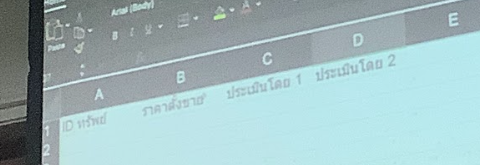

In [122]:
d2['ประเมิน']

KeyError: ignored